# Fundamentals of Machine Learning

## Modules imports

There are many ways to import modules and classes in notebooks, but there is a best practice.

In [ ]:
import sklearn # import of entire library
model = sklearn.linear_model.LinearRegression() # must type library and module prefix every time

import sklearn.linear_model # import of entire module
model = linear_model.LinearRegression() # must type module prefix every time

from sklearn import linear_model # import of entire module
model = linear_model.LinearRegression() # must type module prefix every time

from sklearn.linear_model import * # import of entire module
model = LinearRegression()

## Linear regression with SKLearn

### Data import

In [ ]:
import pandas as pd

data = pd.read_csv("./data/ML_Houses_dataset.csv")

data.head()

### Data Exploration

In [ ]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

# N.B. to examine the presence of outliers also a boxplot could be of help

### Training and feature/target split

In [ ]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

### Model attributes

In [ ]:
# View the model's slope (a)
print(model.coef_)
# View the model's intercept (b)
print(model.intercept_)

### Scoring & Predicting

In [ ]:
# Evaluate the model's performance...
print(model.score(X,y))

#  ... and predict on new data
print(model.predict([[1000]]))

### Sklearn modelling flow

In [ ]:
from sklearn import # modelImport the model
model = model() #Instanciate the model
model.fit(X, y) #Train the model
model.score(new_X, new_y) #Evaluate the model
model.predict(new_X) #Make predictions

## Generalization

### The holdout method

In [ ]:
# the classic way

from sklearn.model_selection import train_test_split

# split the data into train and test
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

# Ready Xs and ys
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

In [ ]:
# the "pythonian" way

# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Training and scoring

In [ ]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

### Data split is random

In [ ]:
# Different random splits will create different results
### RUN THIS CELL MULTIPLE TIMES TO SEE DIFFERENT SCORES

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

### Cross validation (cross_validate function)

In [ ]:
from sklearn.model_selection import cross_validate

# Instanciate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']

# Mean of scores
cv_results['test_score'].mean()

### Learning Curves with Sklearn

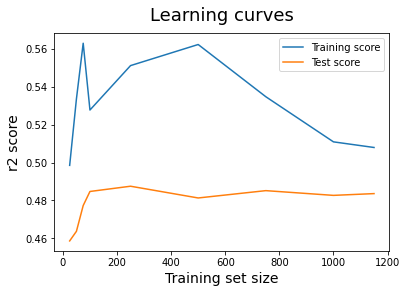

In [9]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(),
                                                        X=X,
                                                        y=y,
                                                        train_sizes=train_sizes,
                                                        cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# Data preparation

- Duplicates
- Missing data
- Outliers
- Scaling
- Balancing
- Encoding
- Discretizing
- Feature creation
- Feature selection

### Duplicates

In [ ]:
len(data) # Check number of rows before removing duplicates

data.duplicated() # Check whether a row is a duplicated version of a previous row

data.duplicated().sum() # Compute the number of duplicated rows

data = data.drop_duplicates() # Remove duplicates

### Detecting...

In [ ]:
data.isnull().sum().sort_values(ascending=False) #NaN count for each column

data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

### ... and handling Missing data

In [ ]:
(data.WallMat.isnull().sum()/len(data))*100 # Percentage of missing values in a column, e.g. WallMat
                                            # from given dataset

data.drop(columns='WallMat', inplace=True) # Drop WallMat COLUMN entirely

data.head()

In [ ]:
import numpy as np

(data.Alley.isnull().sum()/len(data))*100 #Percentage of missing values in Alley

data.Alley.replace(np.nan, "NoAlley", inplace=True) #Replace NaN by "NoAlley"

data.Alley.value_counts()#Check count of each category

In [ ]:
(data.Pesos.isnull().sum()/len(data))*100 # Percentage of missing values in Pesos

data.dropna(subset=['Pesos']) # Option 1: Drop ROWS where Pesos value is missing

data.Pesos.replace(np.nan, data.Pesos.mean()) # Option 2: Replace missing Pesos values with mean

#### Sklearn's SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['Pesos']]) # Call the "fit" method on the object

data['Pesos'] = imputer.transform(data[['Pesos']]) # Call the "transform" method on the object

imputer.statistics_ # The mean is stored in the transformer's memory

### (Outliers) Detecting...

-1

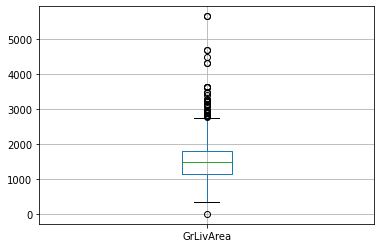

In [12]:
data[['GrLivArea']].boxplot()

In [13]:
data['GrLivArea'].min() 
-1

-1

### ... and handling

<AxesSubplot:>

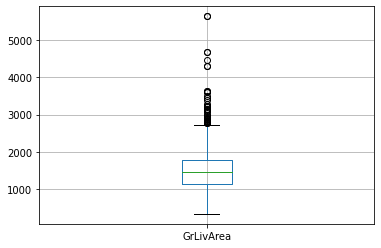

In [15]:
# Dropping Outliers
false_observation = data['GrLivArea'].argmin() # Get index corresponding to minimum value

data = data.drop(false_observation).reset_index(drop=True) # Drop row

data[['GrLivArea']].boxplot() # Visualize boxplot

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # imports

In [ ]:
sscaler = StandardScaler()
mmscaler = MinMaxScaler()
rscaler = RobustScaler() # initialization

In [ ]:
X = data.drop(columns="target_column_name") # selecting features
selectedscaler.fit(X) # fitting the data
X_scaled = selectedscaler.transform(X) # scale the data

#### NB

 There isn't a precise rule of thumb for the feature scaler selection, rather depends on the case.

Some examples are:
- your features are absolute values (e.g. Age) and you don't have outliers? MinMax
- not absolute values and no big outliers? StandardScaler(mu = 0 & std = 1) might be useful to you
- the dataset is a complete mess, full of outliers and wonky data? RobustScaler comes to help!